In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [31]:
df = pd.read_csv('./insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
df.drop(columns=['region','sex'], inplace=True)
df

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830
1334,18,31.920,0,no,2205.98080
1335,18,36.850,0,no,1629.83350
1336,21,25.800,0,no,2007.94500


In [33]:
df['smoker'] = df['smoker'].str.replace('yes', '1')
df['smoker'] = df['smoker'].str.replace('no', '0')
df['smoker'] = df['smoker'].astype(int)
df

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


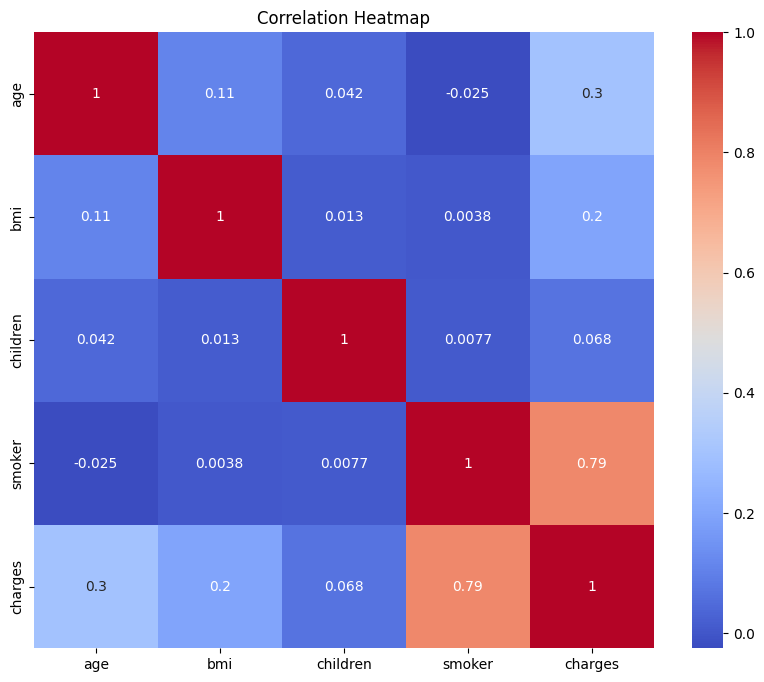

In [34]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
x = df.drop(columns='charges').to_numpy()
y = np.array(df['charges'])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Z-score normalization for feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("Training Data:", x_train.shape, y_train.shape)
print("Testing Data:", x_test.shape, y_test.shape)

Training Data: (1070, 4) (1070,)
Testing Data: (268, 4) (268,)


In [37]:
model = Ridge(alpha=0.01, max_iter=1500)
model.fit(x_train_scaled,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,1500
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [38]:
y_pred = model.predict(x_test_scaled)

In [39]:
r2 = r2_score(y_test, y_pred)
r2

0.7811144034880845

In [40]:
from sklearn.linear_model import Ridge
import joblib

# After training
joblib.dump(model, "ridge_sklearn.pkl")

['ridge_sklearn.pkl']